In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import numpy
print('numpy:', numpy.__version__)
import scipy
print('scipy:', scipy.__version__)
import matplotlib
print('matplotlib:', matplotlib.__version__)
import IPython
print('iPython:', IPython.__version__)
import sklearn
print('scikit-learn:', sklearn.__version__)
import keras
print('keras: ', keras.__version__)
import pandas as pd

Using TensorFlow backend.


('numpy:', '1.13.1')
('scipy:', '0.19.1')
('matplotlib:', '2.0.2')
('iPython:', '5.5.0')
('scikit-learn:', '0.19.0')
('keras: ', '2.0.2')


In [4]:
train = numpy.genfromtxt("dengue_features_train.csv", dtype=None, delimiter=',', names=True) 
train_frame = pd.DataFrame(train)     
train_frame.head()



,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
train_labels = numpy.genfromtxt("dengue_labels_train.csv", dtype=None, delimiter=',', names=True) 
train_labels_frame = pd.DataFrame(train_labels)     
train_labels_frame.head()


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
final_train = train_frame.join(train_labels_frame.set_index(['city','year', 'weekofyear']), on=['city','year', 'weekofyear'])


In [7]:
final_train.fillna(0, inplace=True)
final_train.shape


(1456, 25)

In [8]:
from sklearn.cross_validation import train_test_split
#X = final_train[:,0:25] 
#Y = final_train[:,1]
train, test = train_test_split(final_train, test_size=0.2)


/Users/jyotirmoysundi/miniconda2/envs/ass2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
y_train = train['total_cases']
x_train = train

In [10]:
x_train = x_train.drop(['week_start_date','total_cases'],axis=1)

In [11]:
x_train['city'] = x_train.city.astype('category')
city_dict = dict( enumerate(x_train['city'].cat.categories) )
x_train['city'] = x_train.city.cat.codes
city_dict

{0: 'iq', 1: 'sj'}

In [12]:
x_train.shape

(1164, 23)

In [ ]:
def larger_model():
    model = Sequential()
    model.add(Dense(23, input_dim=23, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    #model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=20, batch_size=1500, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
model = larger_model()
y_test = test['total_cases']
x_test = test
x_test = x_test.drop(['week_start_date','total_cases'],axis=1)
x_test['city'] = x_test.city.astype('category')
x_test['city'] = x_test.city.cat.codes


In [ ]:
model.fit(x_train.as_matrix(), y_train.as_matrix(), epochs=100, batch_size=100, verbose=1) 


In [ ]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test.as_matrix(), model.predict(x_test.as_matrix()))
print("Score: %.2f score" % (score))

In [ ]:
x_test.head()


In [ ]:
test_actual = numpy.genfromtxt("dengue_features_test.csv", dtype=None, delimiter=',', names=True) 
test_actual_frame = pd.DataFrame(test_actual)     
test_actual_frame = test_actual_frame.drop(['week_start_date'],axis=1)
test_actual_frame.head()
test_actual_frame.fillna(0, inplace=True)
test_actual_frame.shape
test_actual_frame['city'] = test_actual_frame.city.astype('category')
test_actual_frame['city'] = test_actual_frame.city.cat.codes
test_actual_frame.head()


In [ ]:
scores = model.predict(test_actual_frame.as_matrix())

In [ ]:
len(scores)
numpy.savetxt('p_scores.txt', scores) 

In [ ]:
x_train.describe()   

In [18]:

#y_train = train['total_cases']
#x_train = train
#from pandas.tools.plotting import scatter_matrix
#from pandas.plotting import scatter_matrix
#import imp
#imp.find_module("matplotlib")
#scatter_matrix(train, alpha=0.2, diagonal='kde')

import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(train, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13af3e950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14d406210>]], dtype=object)

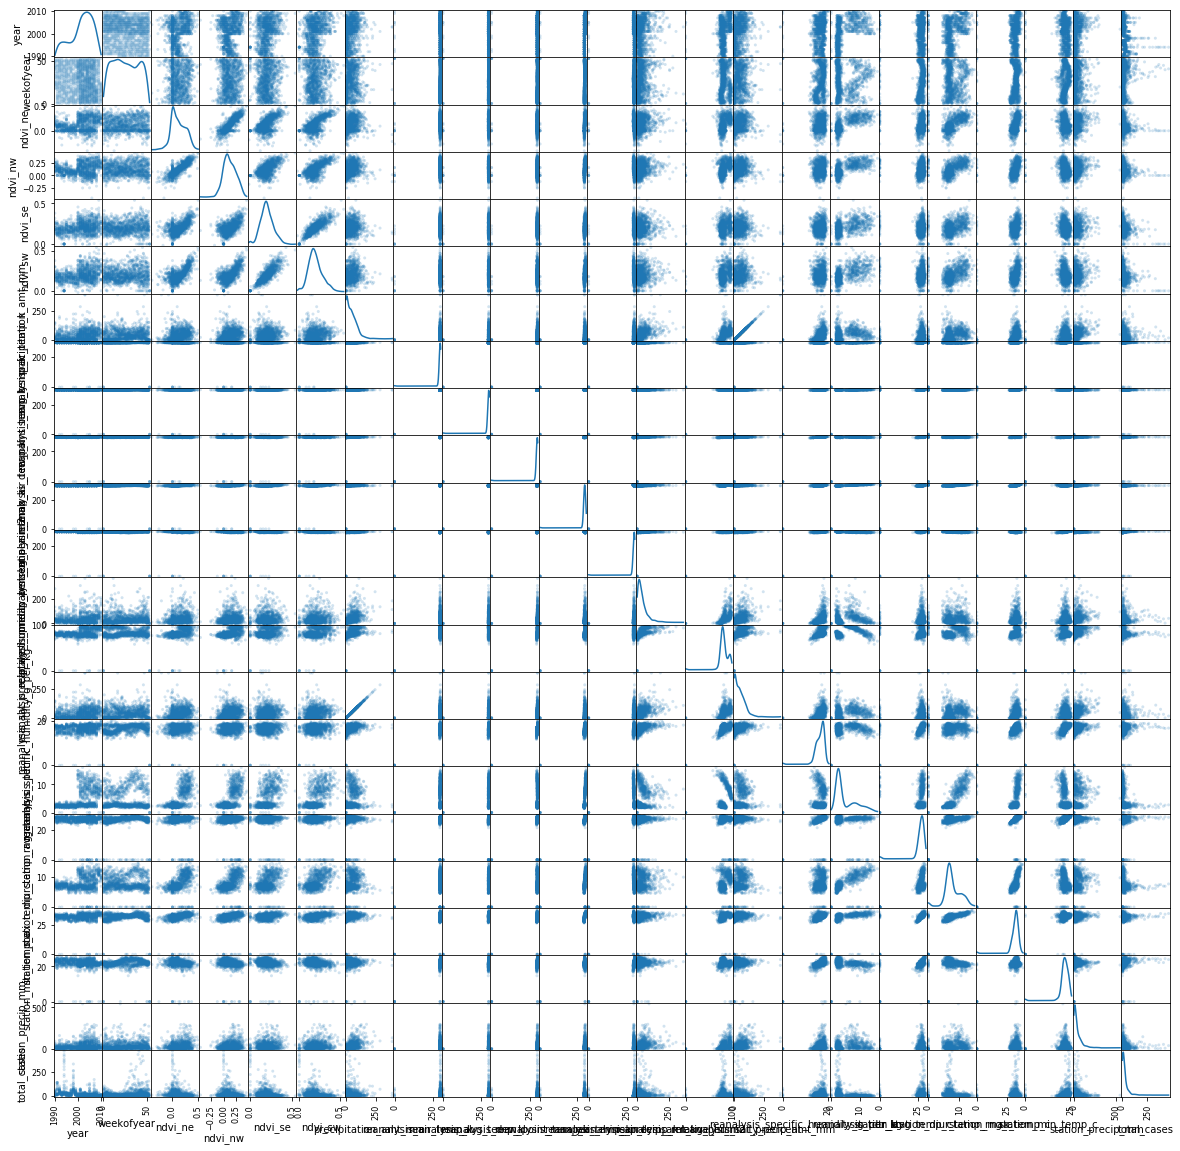

In [19]:
plt.show()